In [1]:
import utils_simulation as ut
import copulas_impl as cop
import pandas as pd

In [2]:
portfolio = ut.load_portfolio()
correlation_matrix = pd.read_csv("correlation_matrix.csv", header=None)
portfolio.head()

,Loan_ID,Loan_Amount,Maturity_Years,Default_Probability
0,Loan_1,1.061810e+06,2,0.156484
1,Loan_2,1.926071e+06,2,0.103821
2,Loan_3,1.597991e+06,4,0.109319
3,Loan_4,1.397988e+06,8,0.091233
4,Loan_5,7.340280e+05,7,0.014830


# Simulation Générale

## Gaussian Copulas

In [3]:
gaussian_samples = cop.gaussian_copula_sample(correlation_matrix.to_numpy(), 100)

In [4]:
defaults_matrix = ut.simulate_defaults(gaussian_samples, portfolio["Default_Probability"].values)

Résumé des scénarios de défauts :
Taux moyen de défaut : 9.98%
Taux minimum de défaut : 2.00%
Taux maximum de défaut : 24.00%


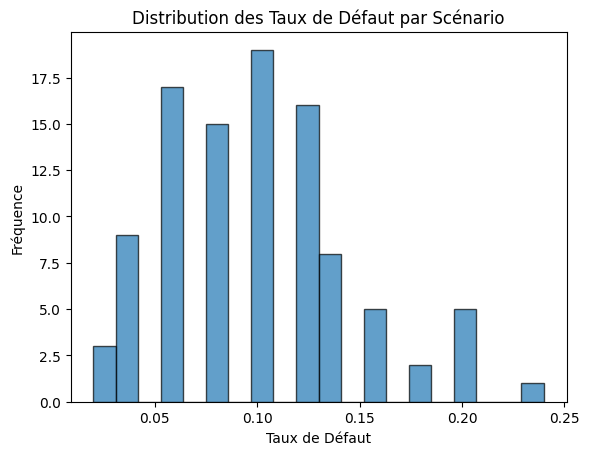

Probabilité de scénarios avec plus de 30% de défauts : 0.00%


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/creditProj/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/creditProj/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


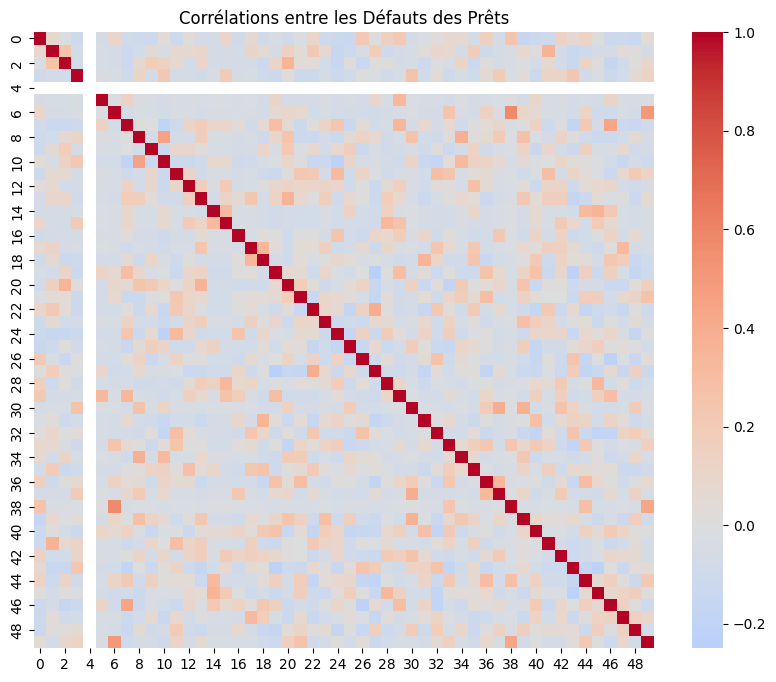

Pertes moyennes : $3,533,274
Pertes maximales : $9,140,691
Pertes minimales : $425,544
Taux de défaut moyen par tranche :
 Tranche
0-1M      0.097273
1-1.5M    0.108750
1.5-2M    0.092500
Name: Average_Default_Contribution, dtype: float64


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/utils_similation.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates_by_tranche = portfolio.groupby("Tranche")["Average_Default_Contribution"].mean()


In [5]:
ut.print_summary(defaults_matrix, portfolio, recovery_rate=0.4)

## Clayton Copulas

In [3]:
Clayton_samples = cop.clayton_copula_multivariate(theta=1,num_samples=100,portfolio_size=len(portfolio))

In [5]:
defaults_matrix = ut.simulate_defaults(Clayton_samples, portfolio["Default_Probability"].values)

Résumé des scénarios de défauts :
Taux moyen de défaut : 25.48%
Taux minimum de défaut : 4.00%
Taux maximum de défaut : 100.00%


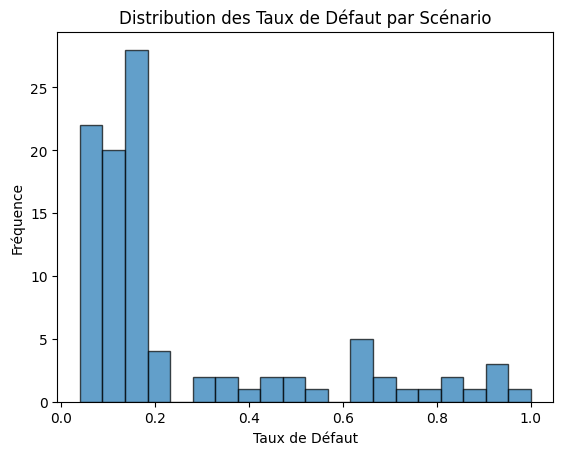

Probabilité de scénarios avec plus de 30% de défauts : 25.00%


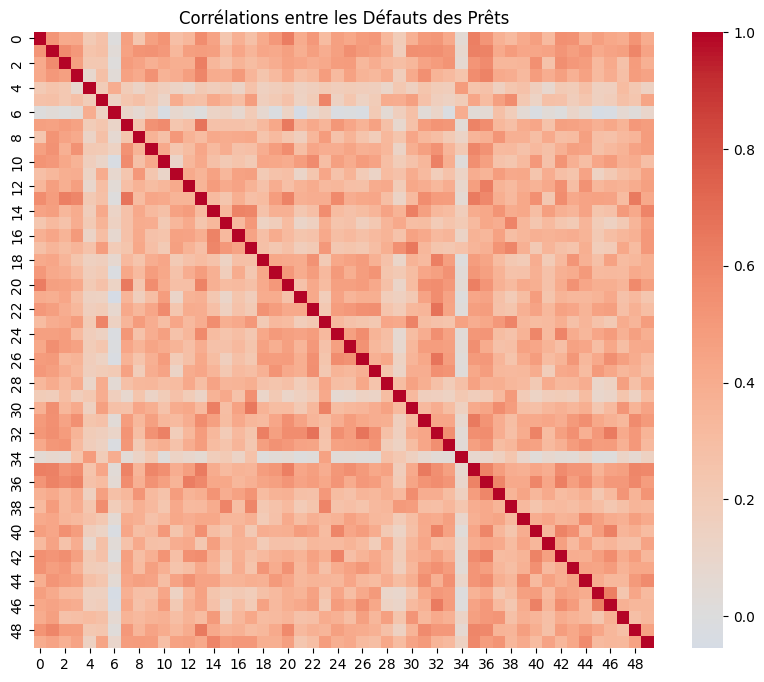

Pertes moyennes : $8,991,371
Pertes maximales : $35,066,576
Pertes minimales : $1,317,341
Taux de défaut moyen par tranche :
 Tranche
0-1M      0.250909
1-1.5M    0.262500
1.5-2M    0.251667
Name: Average_Default_Contribution, dtype: float64


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/utils_similation.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates_by_tranche = portfolio.groupby("Tranche")["Average_Default_Contribution"].mean()


In [6]:
ut.print_summary(defaults_matrix, portfolio, recovery_rate=0.4)

## Gumbel Copulas

In [9]:
Gumbel_samples = cop.gumbel_copula_multivariate(theta=1,num_samples=100,portfolio_size=len(portfolio)) # Theta >= 2

In [10]:
defaults_matrix = ut.simulate_defaults(Gumbel_samples, portfolio["Default_Probability"].values)

Résumé des scénarios de défauts :
Taux moyen de défaut : 33.22%
Taux minimum de défaut : 6.00%
Taux maximum de défaut : 100.00%


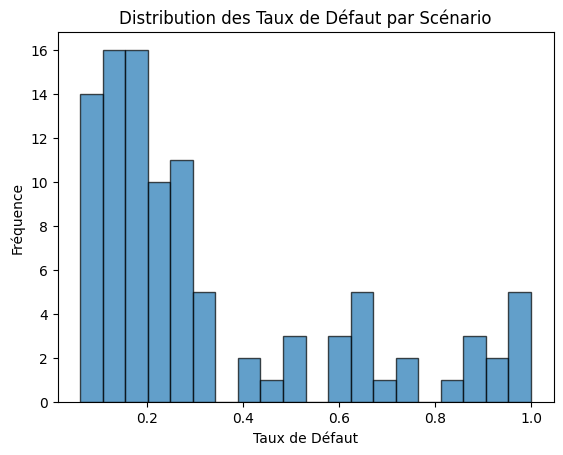

Probabilité de scénarios avec plus de 30% de défauts : 32.00%


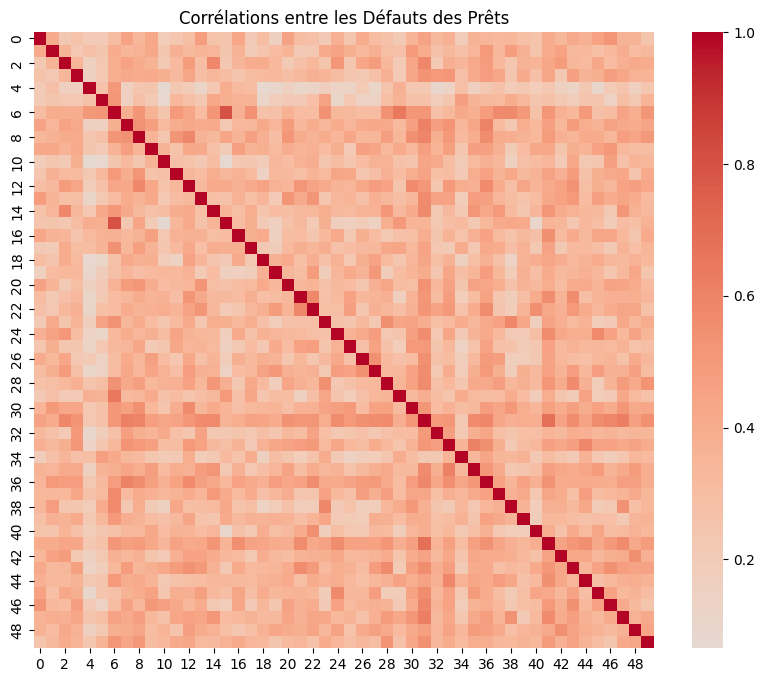

Pertes moyennes : $11,707,939
Pertes maximales : $35,066,576
Pertes minimales : $2,143,144
Taux de défaut moyen par tranche :
 Tranche
0-1M      0.327273
1-1.5M    0.338125
1.5-2M    0.333333
Name: Average_Default_Contribution, dtype: float64


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/utils_similation.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates_by_tranche = portfolio.groupby("Tranche")["Average_Default_Contribution"].mean()


In [11]:
ut.print_summary(defaults_matrix, portfolio, recovery_rate=0.4)

# Tranches

### We first test with the Gaussian Copula

In [3]:
gaussian_samples = cop.gaussian_copula_sample(correlation_matrix.to_numpy(), 100)
defaults_matrix = ut.simulate_defaults(gaussian_samples, portfolio["Default_Probability"].values)
equity_losses, mezzanine_losses, senior_losses =  ut.allocate_losses_by_transches(defaults_matrix, portfolio)

     Tranche  Pertes Moyennes  Pertes Maximales  Pertes Minimales
0     Senior         0.000141            0.0002            0.0000
1  Mezzanine         1.172492           18.3694            0.0000
2     Equity        59.872379          100.0000            9.9332


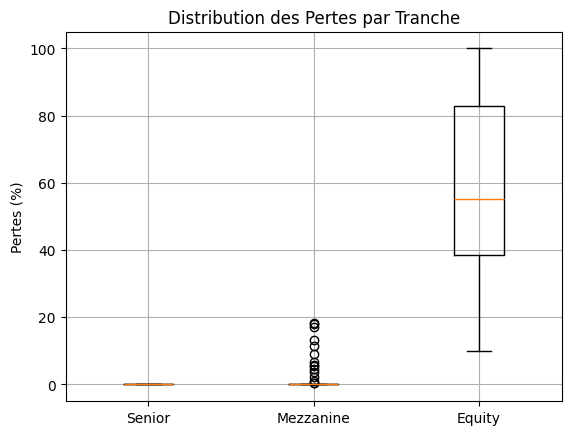

In [4]:
ut.simmulate_losses_tranche(equity_losses, mezzanine_losses, senior_losses)

### Test With Clayton Copulas

In [5]:
Clayton_samples = cop.clayton_copula_multivariate(theta=1,num_samples=100,portfolio_size=len(portfolio))
defaults_matrix = ut.simulate_defaults(Clayton_samples, portfolio["Default_Probability"].values)
equity_losses, mezzanine_losses, senior_losses =  ut.allocate_losses_by_transches(defaults_matrix, portfolio)

     Tranche  Pertes Moyennes  Pertes Maximales  Pertes Minimales
0     Senior         0.000165            0.0002            0.0000
1  Mezzanine        20.692153          100.0000            0.0000
2     Equity        74.741775          100.0000            9.6319


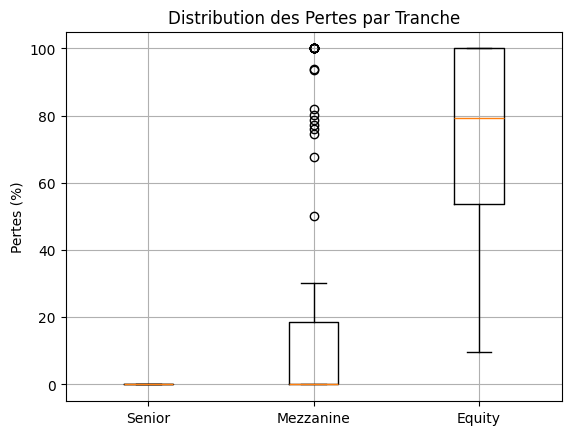

In [6]:
ut.simmulate_losses_tranche(equity_losses, mezzanine_losses, senior_losses)

### Test with Gumbel Copulas

In [7]:
Gumbel_samples = cop.gumbel_copula_multivariate(theta=1,num_samples=100,portfolio_size=len(portfolio))
defaults_matrix = ut.simulate_defaults(Gumbel_samples, portfolio["Default_Probability"].values)
equity_losses, mezzanine_losses, senior_losses =  ut.allocate_losses_by_transches(defaults_matrix, portfolio)

     Tranche  Pertes Moyennes  Pertes Maximales  Pertes Minimales
0     Senior         0.000191            0.0002            0.0001
1  Mezzanine        36.087515          100.0000            0.0000
2     Equity        91.356734          100.0000           30.0367


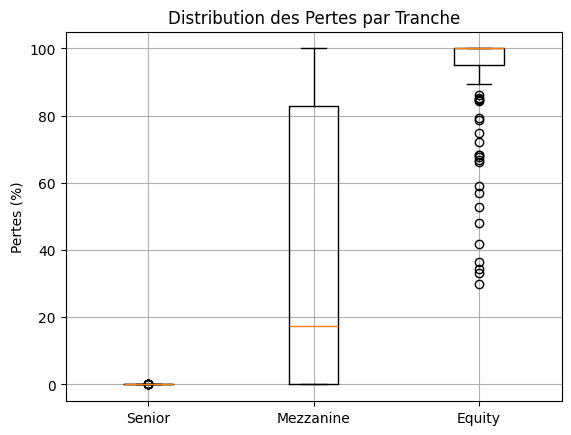

In [8]:
ut.simmulate_losses_tranche(equity_losses, mezzanine_losses, senior_losses)